In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

In [ ]:
exp020 = np.load('/content/drive/MyDrive/DataAnalysis/competicion/competicion_feedback3/wanwan7123/Output/feedback3-Exp020-deberta-v3-base/preds/oof_pred.npy')
exp021 = np.load('/content/drive/MyDrive/DataAnalysis/competicion/competicion_feedback3/wanwan7123/Output/feedback3-Exp021-deberta-v3-base/preds/oof_pred.npy')
exp022 = np.load('/content/drive/MyDrive/DataAnalysis/competicion/competicion_feedback3/wanwan7123/Output/feedback3-Exp022-deberta-v3-base/preds/oof_pred.npy')
exp019 = np.load('/content/drive/MyDrive/DataAnalysis/competicion/competicion_feedback3/wanwan7123/Output/feedback3-Exp019-deberta-v3-large/preds/oof_pred.npy')
exp015 = np.load('/content/drive/MyDrive/DataAnalysis/competicion/competicion_feedback3/wanwan7123/Output/feedback3-Exp015-deberta-v3-base/preds/oof_pred.npy')

In [2]:
exp030 = np.load('/content/drive/MyDrive/DataAnalysis/competicion/competicion_feedback3/wanwan7123/Output/feedback3-Exp030-deberta-v3-large/preds/oof_pred.npy')

In [ ]:
ensemble001 = exp019*0.50 + exp015*0.50

In [3]:
train = pd.read_csv('/content/drive/MyDrive/DataAnalysis/competicion/competicion_feedback3/wanwan7123/Input/train.csv')

In [4]:
# def metric
def mcrmse(preds, df):
    score0 = np.sqrt(mean_squared_error(preds[:, 0], df['cohesion']))
    score1 = np.sqrt(mean_squared_error(preds[:, 1], df['syntax']))
    score2 = np.sqrt(mean_squared_error(preds[:, 2], df['vocabulary']))
    score3 = np.sqrt(mean_squared_error(preds[:, 3], df['phraseology']))
    score4 = np.sqrt(mean_squared_error(preds[:, 4], df['grammar']))
    score5 = np.sqrt(mean_squared_error(preds[:, 5], df['conventions']))
    print(score0, score1, score2, score3, score4, score5)
    return (score0 + score1 + score2 + score3 + score4 + score5)/6

In [5]:
mcrmse(exp030, train)

0.4912980564328488 0.4453784146893713 0.41419551585898046 0.45115361794815656 0.47015877676611795 0.44312450277685816


0.4525514807453888

In [ ]:
mcrmse(exp021, train)

0.48801170277950945 0.44958477192364776 0.41794052256416103 0.4589229649762958 0.47907811663839245 0.45322947862064267


0.45779459291710817

In [ ]:
mcrmse(exp022, train)

0.4917368129197982 0.44978160843638426 0.4165238490625456 0.45812501238092007 0.47816185563021524 0.45209751005511567


0.4577377747474965

In [ ]:
exp027 = np.load('/content/drive/MyDrive/DataAnalysis/competicion/competicion_feedback3/wanwan7123/Output/feedback3-Exp027-deberta-v3-large/preds/oof_pred.npy')
mcrmse(exp027, train)

0.4832422713338684 0.4440238866417485 0.4122048322745138 0.4541352600568978 0.4687716086418902 0.4431710482648594


0.45092481786896305

In [ ]:
mcrmse(exp029, train)

0.4827311016776157 0.44630062433025575 0.41950911508839506 0.45906757372739415 0.4775927436915457 0.45018675882858294


0.4558979862239649

In [ ]:
ddd = pd.DataFrame()

0.47871402790855977 0.4412744676394817 0.4123533012800518 0.4498813919434427 0.46708231859360966 0.4419125742206402


0.4485363469309643

In [ ]:
def make_diff_df(preds, df):
    df['diff_cohesion'] = preds[:, 0] - df['cohesion']
    df['diff_syntax'] = preds[:, 1] - df['syntax']
    df['diff_vocabulary'] = preds[:, 2] - df['vocabulary']
    df['diff_phraseology'] = preds[:, 3] - df['phraseology']
    df['diff_grammer'] = preds[:, 4] - df['grammar']
    df['diff_conventions'] = preds[:, 5] - df['conventions']
    
    return df

In [ ]:
exp027_diff = make_diff_df(exp027, train)

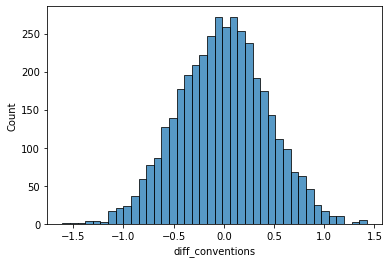

In [ ]:
import seaborn as sns
sns.histplot(exp027_diff['diff_conventions'])

In [ ]:
exp027_diff.to_csv('exp027_diff.csv', index=False)